<a href="https://colab.research.google.com/github/KrAryan/21BDS0018/blob/main/21BDS0018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Submitted By: Kumar Aryan
###Registration No: 21BDS0018
### Dataset - Employee Attrition Dataset
Course: BCSE331L - Exploratory Data Analysis


# 📌 Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# 📌 Load dataset

In [ ]:
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Employee%20Attrition.csv"
df = pd.read_csv(url)

# 📌 Display first few records

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 📌 Dataset dimensions

In [ ]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 1470 rows and 35 columns.


# 📌 Data types and missing values

In [ ]:
df.info()
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# 📌 Handling missing values

In [ ]:
df.dropna(inplace=True)

# 📌 Duplicate check

In [ ]:
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")


Duplicate Rows: 0


# 📌 Separating numerical and categorical columns

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


# ✅ Univariate Analysis

📌 Histogram for Age Distribution

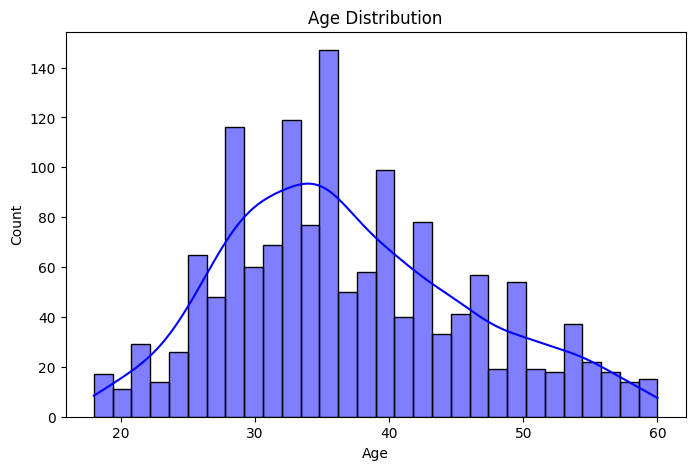

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

📌 Count plot for Attrition

<ipython-input-10-2cc2da8db11f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='coolwarm')


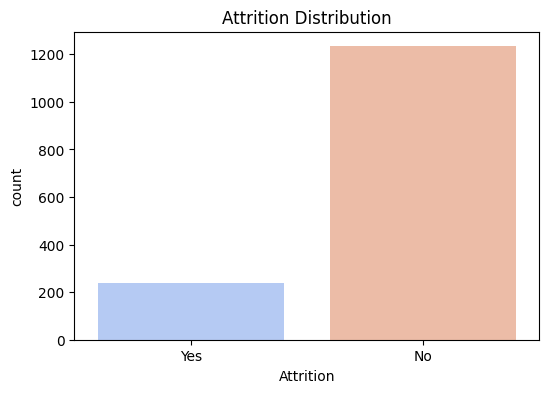

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df, palette='coolwarm')
plt.title("Attrition Distribution")
plt.show()

📌 Boxplot to detect outliers in Monthly Income

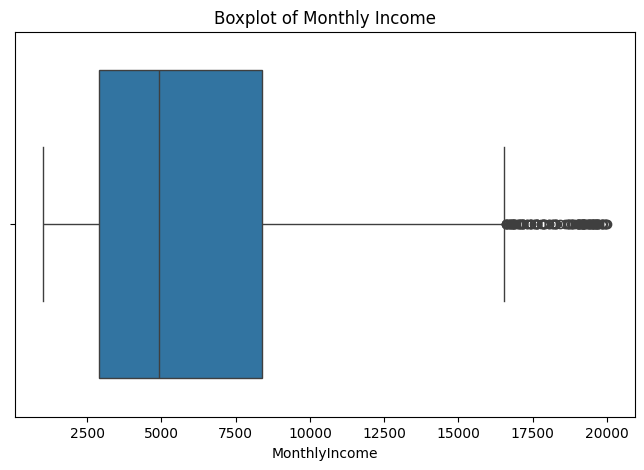

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['MonthlyIncome'])
plt.title("Boxplot of Monthly Income")
plt.show()

📌 Pie Chart for Attrition

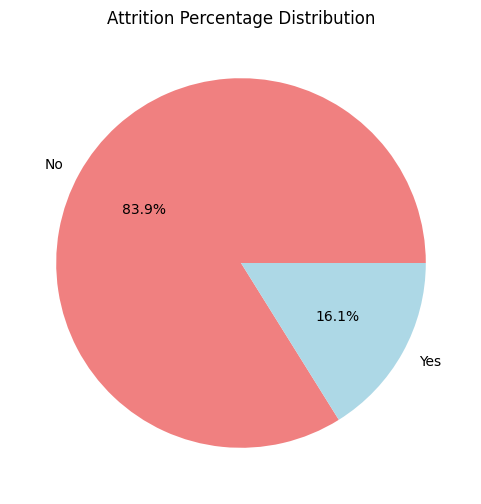

In [ ]:
plt.figure(figsize=(6, 6))
df['Attrition'].value_counts().plot.pie(autopct="%1.1f%%", colors=['lightcoral', 'lightblue'])
plt.title("Attrition Percentage Distribution")
plt.ylabel("")
plt.show()

📌 Frequency Distribution Table for Job Role

In [ ]:
print("\nTop Job Roles Distribution:\n", df['JobRole'].value_counts())


Top Job Roles Distribution:
 JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


📌 Violin Plot (Combines KDE & Boxplot)

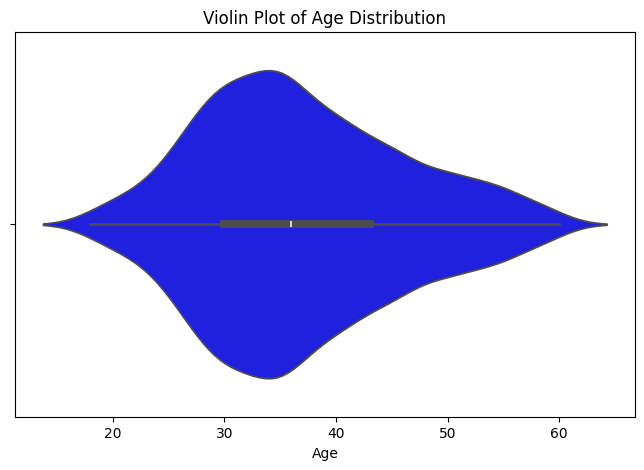

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df['Age'], color="blue")
plt.title("Violin Plot of Age Distribution")
plt.show()

# ✅ Bivariate Analysis

📌 Relationship between Age and Monthly Income

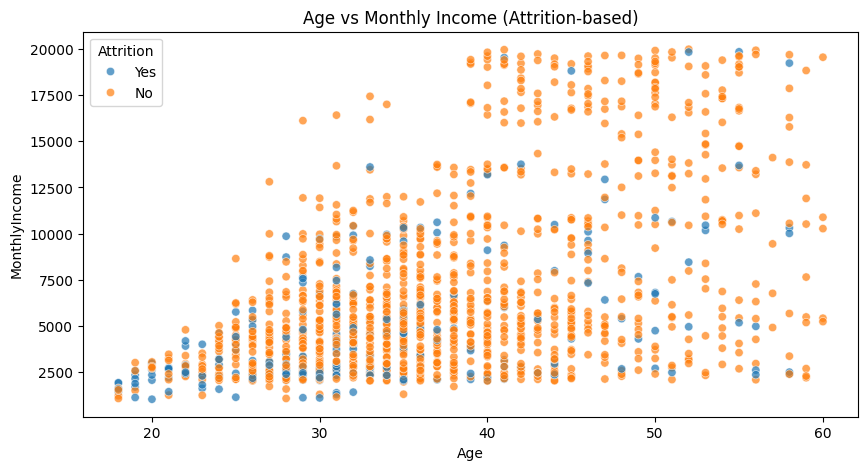

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Age'], y=df['MonthlyIncome'], hue=df['Attrition'], alpha=0.7)
plt.title("Age vs Monthly Income (Attrition-based)")
plt.show()

📌 Boxplot for Monthly Income by Attrition

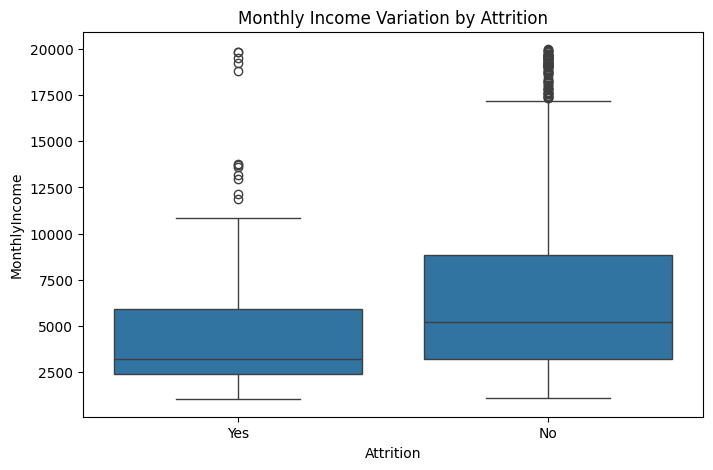

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income Variation by Attrition")
plt.show()

📌 Stacked Bar Chart: Attrition vs JobRole

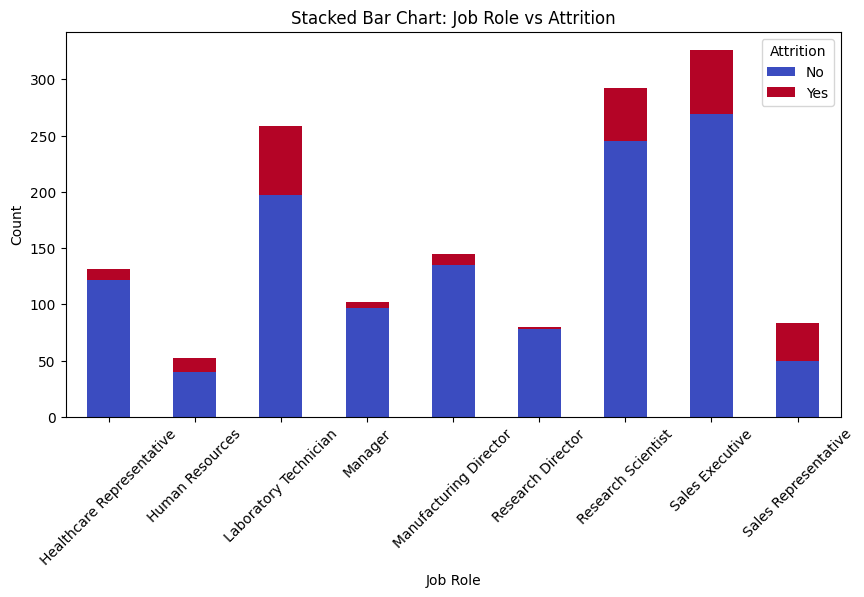

In [ ]:
pd.crosstab(df['JobRole'], df['Attrition']).plot(kind='bar', stacked=True, figsize=(10, 5), colormap='coolwarm')
plt.title("Stacked Bar Chart: Job Role vs Attrition")
plt.xlabel("Job Role")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

📌 Point Plot (Mean Comparison between Categories)

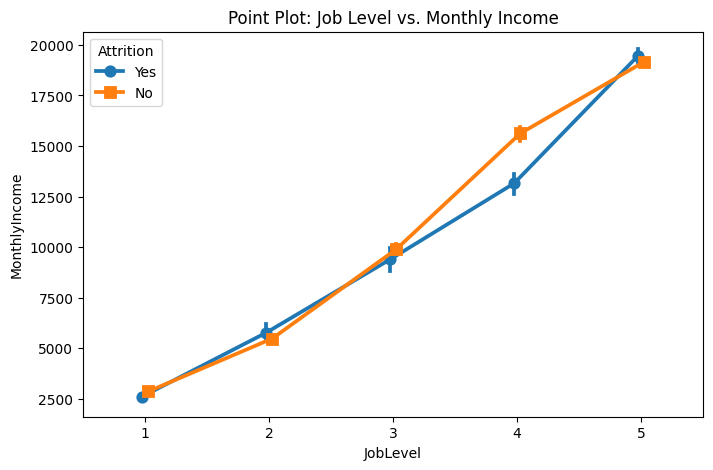

In [ ]:
plt.figure(figsize=(8, 5))
sns.pointplot(x='JobLevel', y='MonthlyIncome', hue='Attrition', data=df, dodge=True, markers=["o", "s"])
plt.title("Point Plot: Job Level vs. Monthly Income")
plt.show()

📌 Boxen Plot

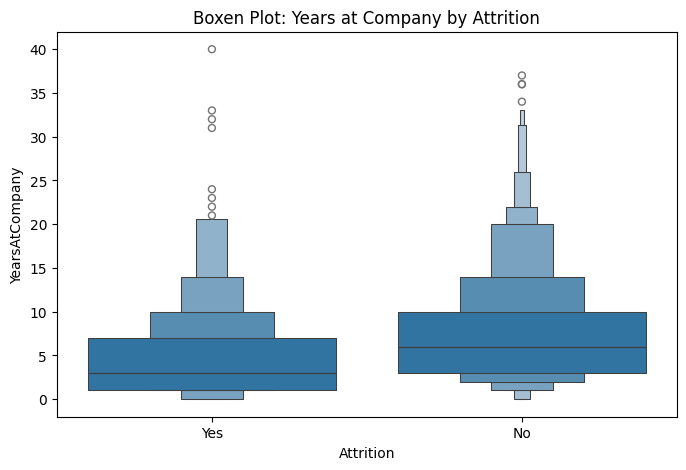

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxenplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title("Boxen Plot: Years at Company by Attrition")
plt.show()

📌 Hexbin Plot

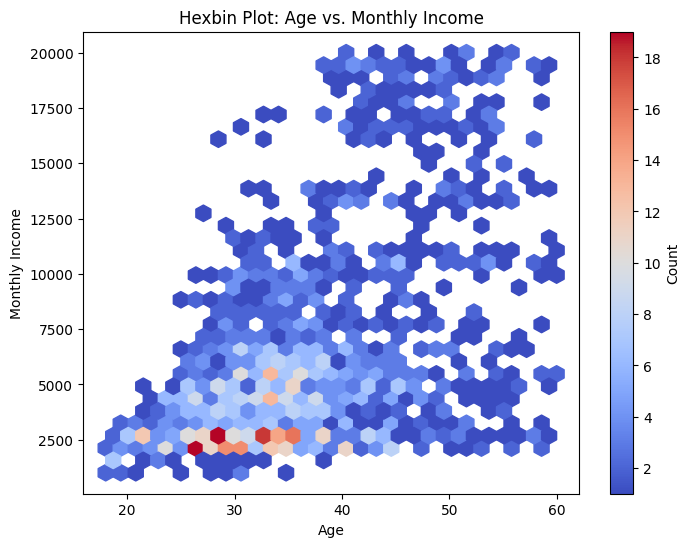

In [ ]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['Age'], df['MonthlyIncome'], gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar(label='Count')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('Hexbin Plot: Age vs. Monthly Income')
plt.show()

# ✅ Data Transformation

📌 Standardization of Monthly Income

In [ ]:
scaler = StandardScaler()
df['Income_Standardized'] = scaler.fit_transform(df[['MonthlyIncome']])

📌 Binning Age into categories

In [ ]:
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60], labels=["Young", "Mid-Age", "Senior", "Older"])

print(df[['Age', 'Age_Group', 'MonthlyIncome', 'Income_Standardized']].head())


   Age Age_Group  MonthlyIncome  Income_Standardized
0   41    Senior           5993            -0.108350
1   49    Senior           5130            -0.291719
2   37   Mid-Age           2090            -0.937654
3   33   Mid-Age           2909            -0.763634
4   27     Young           3468            -0.644858


# ✅ Multivariate Analysis

📌 Heatmap of correlations (Numerical Data)

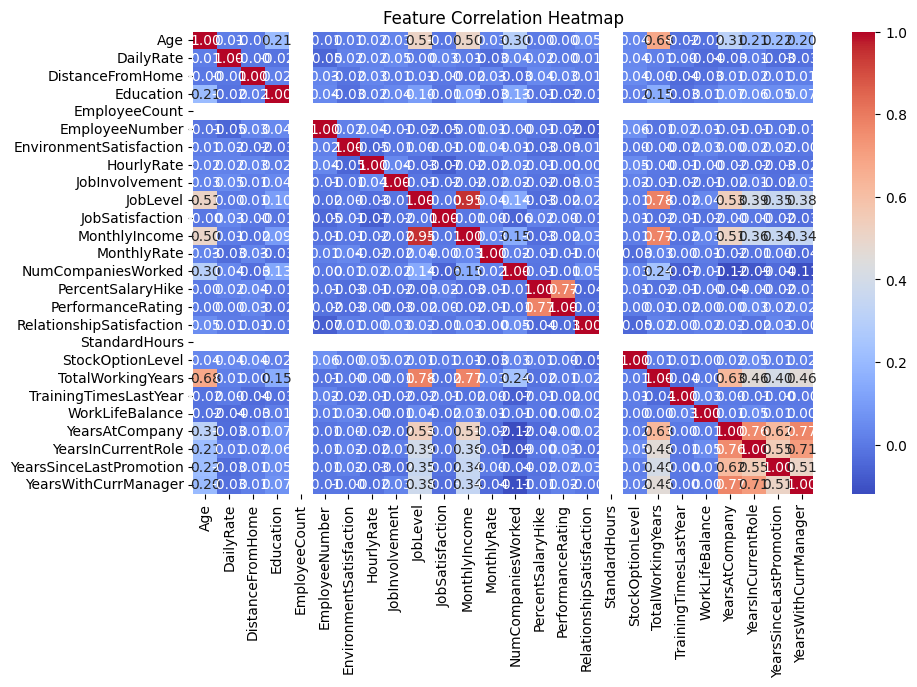

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

✅ 3D Scatter Plot for Three Features at a Time

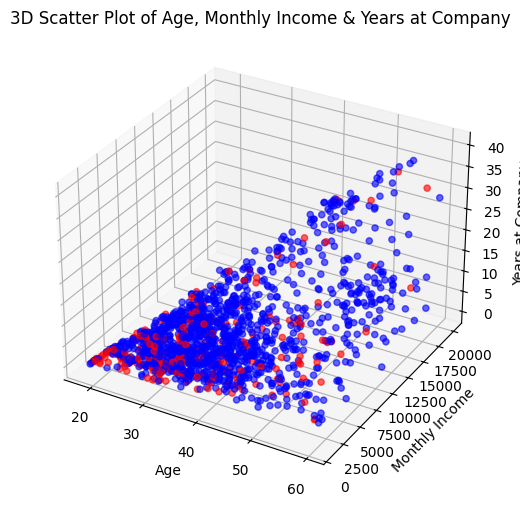

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Choosing three important features
x = df['Age']
y = df['MonthlyIncome']
z = df['YearsAtCompany']
color_map = {'Yes': 'red', 'No': 'blue'}

ax.scatter(x, y, z, c=df['Attrition'].map(color_map), alpha=0.6)
ax.set_xlabel("Age")
ax.set_ylabel("Monthly Income")
ax.set_zlabel("Years at Company")
ax.set_title("3D Scatter Plot of Age, Monthly Income & Years at Company")
plt.show()

✅  FacetGrid for Multiple Categorical Variables

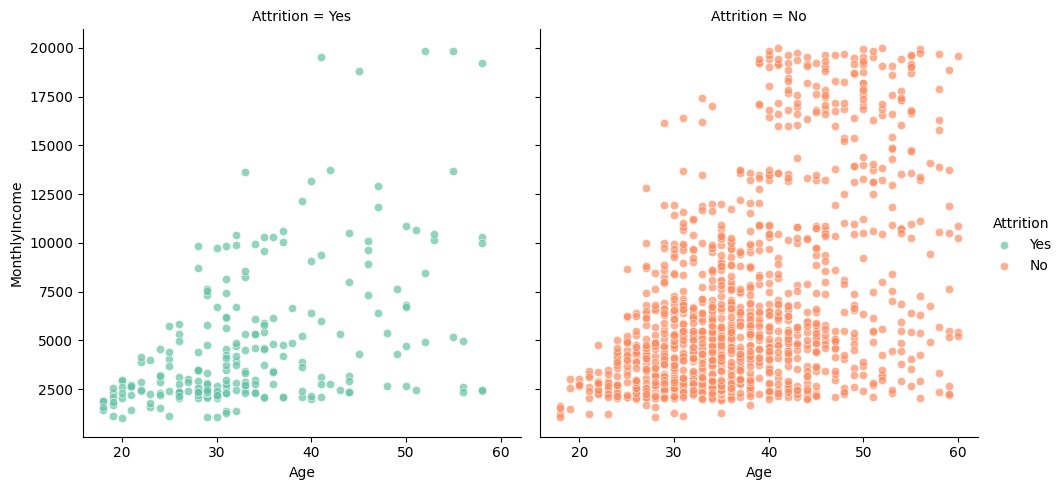

In [ ]:
g = sns.FacetGrid(df, col="Attrition", hue="Attrition", height=5, palette="Set2")
g.map_dataframe(sns.scatterplot, x="Age", y="MonthlyIncome", alpha=0.7)
g.add_legend()
plt.show()

# ✅ Statistical Hypothesis Testing

📌 T-Test: Do Attrition employees have different Monthly Income?

In [ ]:
attrition_yes = df[df['Attrition'] == 'Yes']['MonthlyIncome']
attrition_no = df[df['Attrition'] == 'No']['MonthlyIncome']

t_stat, p_value = stats.ttest_ind(attrition_yes, attrition_no)
print(f"\nT-Test for Monthly Income difference:\nT-statistic = {t_stat}, P-value = {p_value}")

if p_value < 0.05:
    print("Significant difference in Monthly Income based on Attrition.")
else:
    print("No significant difference in Monthly Income based on Attrition.")



T-Test for Monthly Income difference:
T-statistic = -6.203935765608938, P-value = 7.147363985353811e-10
Significant difference in Monthly Income based on Attrition.


# ✅ Save Processed Data

In [ ]:
df.to_csv("Cleaned_Employee_Attrition.csv", index=False)